In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # 不输出warning

In [3]:
# 读取数据
train = pd.read_csv('bank-additional1.csv')
train.head()
print('实验数据大小:', train.shape)  # 查看实验数据集数据
train.info()  # 查看实验数据集的数据缺失情况
train.head()  # 查看数据的具体组成


实验数据大小: (4119, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# 删除重复值
train.drop_duplicates(inplace=True)

In [5]:
# 检查是否有缺失值
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# 数值型指标描述
train.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# 非数值型指标描述
train.describe(include='O')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


Text(0.5, 1.0, '数据特征类型')

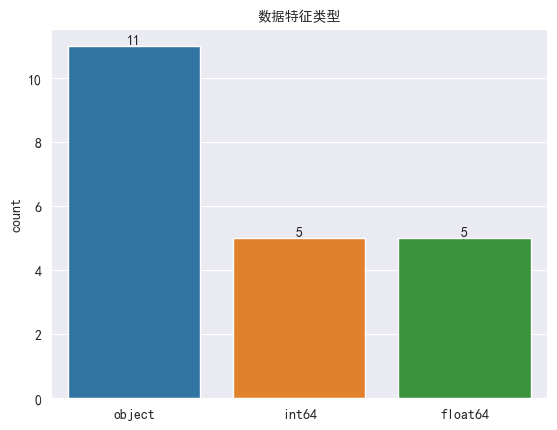

In [8]:
sns.set_style('darkgrid')  # 设置背景风格为暗
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使图片中的中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 使图片中的负号正常显示
ax = sns.barplot(x=train.dtypes.value_counts().index,
                 y=train.dtypes.value_counts()[[0, 1, 2]])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("数据特征类型", fontsize=10)

y
no     3668
yes     451
Name: count, dtype: int64

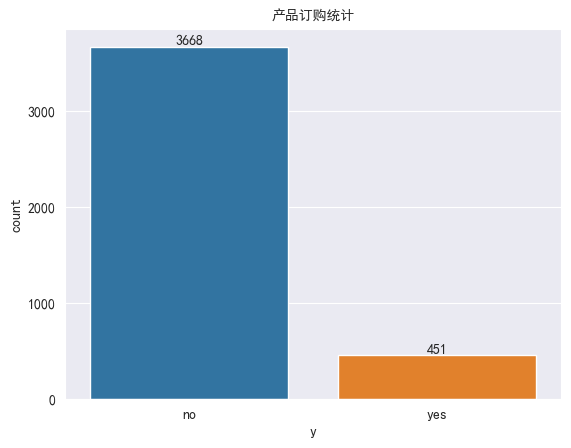

In [10]:
ax = sns.barplot(x=train['y'].value_counts().index,
                 y=train['y'].value_counts()[[0, 1]])
for bars in ax.containers:
    ax.bar_label(bars)
plt.yticks(range(0, 4000, 1000))
plt.title("产品订购统计", fontsize=10)
train['y'].value_counts()

In [11]:
y_map = {'yes': 1, 'no': 0}
train['y'] = train['y'].map(y_map)  # 将yes和no用1，0代替

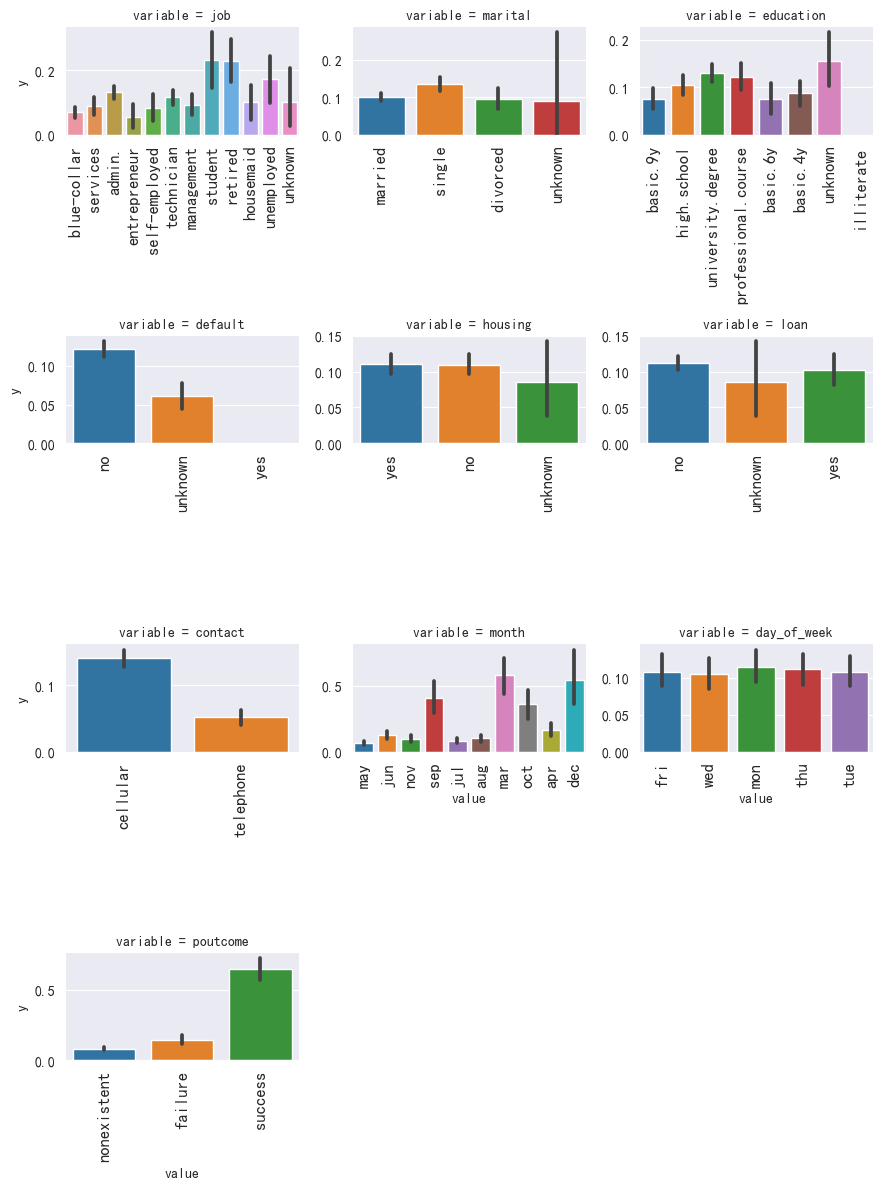

In [14]:
# 离散变量列名
object_columns = list(train.select_dtypes(include=['object']).columns)
# 绘制离散型变量关于是否购买产品的关系图


def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x = plt.xticks(rotation=90, fontsize=12)


f = pd.melt(train,  value_vars=object_columns, id_vars='y')
g = sns.FacetGrid(f, col="variable", col_wrap=3,
                  sharex=False, sharey=False)
g = g.map(barplot, "value", 'y')

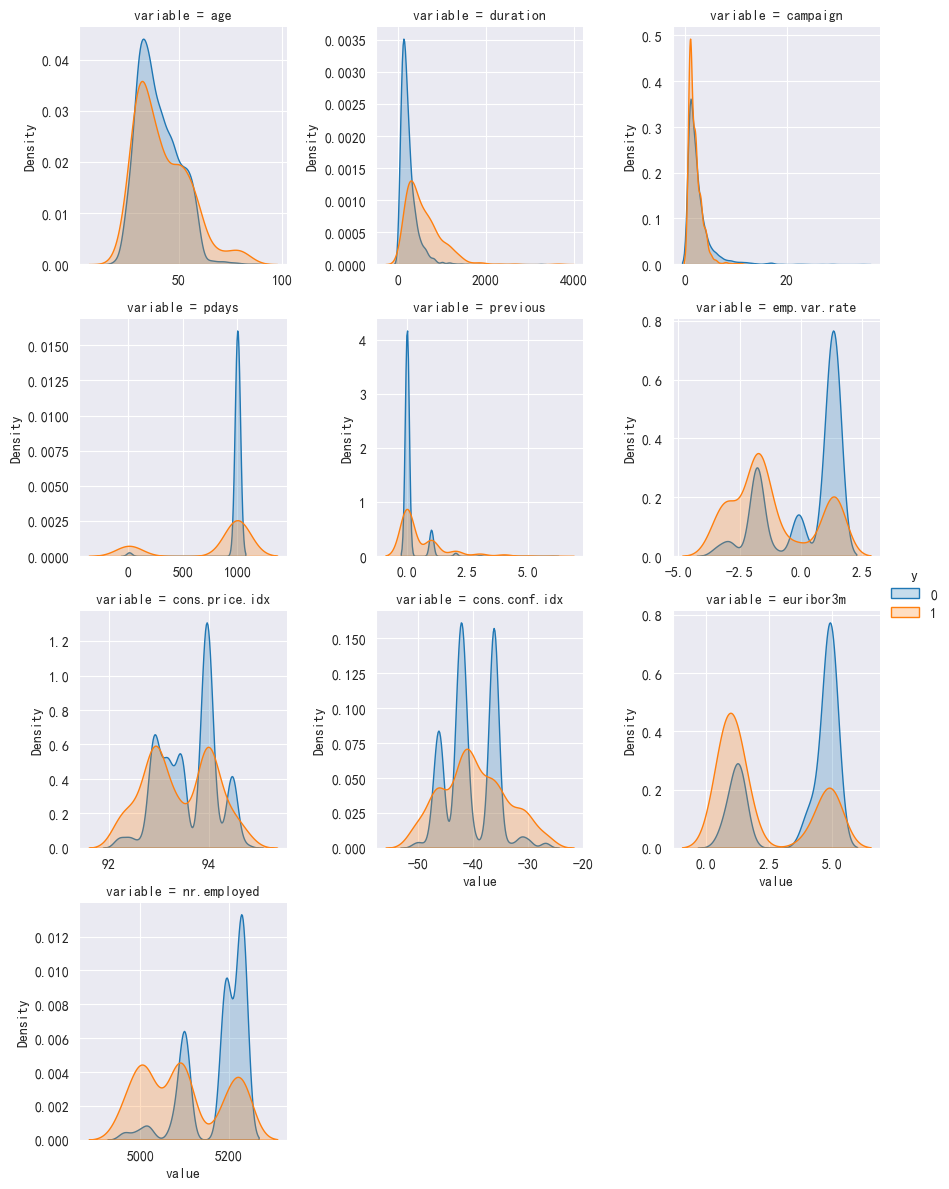

In [16]:
num_columns = ['age', 'duration','campaign', 'pdays',
               'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
f = pd.melt(train,  value_vars=num_columns, id_vars='y')
g = sns.FacetGrid(f, col="variable", col_wrap=3,
                  sharex=False, sharey=False,  hue='y')
g = g.map(sns.kdeplot, "value", shade=True)
g.add_legend()